##### In linear regression, the type of data we deal with is quantitative, whereas we use classification models to deal with qualitative data or categorical data. The algorithms used for solving a classification problem first predict the probability of each of the categories of the qualitative variables, as the basis for making the classification. And, as the probabilities are continuous numbers, classification using probabilities also behave like regression methods. Logistic regression is one such type of classification model which is used to classify the dependent variable into two or more classes or categories.

#### Why don’t we use Linear regression for classification problems?
Let’s suppose you took a survey and noted the response of each person as satisfied, neutral or Not satisfied. Let’s map each category:

Satisfied – 2

Neutral – 1

Not Satisfied – 0

But this doesn’t mean that the gap between Not satisfied and Neutral is same as Neutral and satisfied. There is no mathematical significance of these mapping. We can also map the categories like:

Satisfied – 0

Neutral – 1

Not Satisfied – 2

- It’s completely fine to choose the above mapping. If we apply linear regression to both the type of mappings, we will get different sets of predictions. Also, we can get prediction values like 1.2, 0.8, 2.3 etc. which makes no sense for categorical values. So, there is no normal method to convert qualitative data into quantitative data for use in linear regression. Although, for binary classification, i.e. when there only two categorical values, using the least square method can give decent results. Suppose we have two categories Black and White and we map them as follows:
Black – 0

White - 1

We can assign predicted values for both the categories such as Y> 0.5 goes to class white and vice versa. Although, there will be some predictions for which the value can be greater than 1 or less than 0 making them hard to classify in any class. Nevertheless, linear regression can work decently for binary classification but not that well for multi-class classification. Hence, we use classification methods for dealing with such problems.

## Logistic Regression
- Logistic regression is one such regression algorithm which can be used for performing classification problems. 
- It calculates the probability that a given value belongs to a specific class. 
- If the probability is more than 50%, it assigns the value in that particular class else if the probability is less than 50%, the value is assigned to the other class. 
- Therefore, we can say that logistic regression acts as a binary classifier.

**Working of a Logistic Model** <br>
For linear regression, the model is defined by: 
y = B0 + B1x  and for logistic regression, we calculate probability, i.e. y is the probability of a given variable x belonging to a certain class. Thus, it is obvious that the value of y should lie between 0 and 1.

But, when we use equation(i) to calculate probability, we would get values less than 0 as well as greater than 1. That doesn’t make any sense . So, we need to use such an equation which always gives values between 0 and 1, as we desire while calculating the probability.

**Sigmoid function**<br>
We use the sigmoid function as the underlying function in Logistic regression. 

## Why do we use the Sigmoid Function?

- The sigmoid function’s range is bounded between 0 and 1. Thus it’s useful in calculating the probability for the Logistic   function.
- It’s derivative is easy to calculate than other functions which is useful during gradient descent calculation.
- It is a simple way of introducing non-linearity to the model.
- Although there are other functions as well, which can be used, but sigmoid is the most common function used for logistic   regression.

## Evaluation of a Classification Model
- In machine learning, once we have a result of the classification problem, how do we measure how accurate our               classification is? For a regression problem, we have different metrics like R Squared score, Mean Squared Error etc. what   are the metrics to measure the credibility of a classification model?

- Metrics In a regression problem, the accuracy is generally measured in terms of the difference in the actual values and     the predicted values. In a classification problem, the credibility of the model is measured using the confusion matrix     generated, i.e., how accurately the true positives and true negatives were predicted. The different metrics used for this   purpose are:
  - Accuracy
  - Recall
  - Precision
  - F1 Score
  - Specifity
  - AUC( Area Under the Curve)
  - ROC(Receiver Operator Characteristic)
  - Classification Report

# Confusion Matrix
- True Positive(TP): A result that was predicted as positive by the classification model and also is positive

- True Negative(TN): A result that was predicted as negative by the classification model and also is negative

- False Positive(FP): A result that was predicted as positive by the classification model but actually is negative

- False Negative(FN): A result that was predicted as negative by the classification model but actually is positive.
***The Credibility of the model is based on how many correct predictions did the model do.**

##  ROC(Receiver Operator Characteristic)
We know that the classification algorithms work on the concept of probability of occurrence of the possible outcomes. A probability value lies between 0 and 1. Zero means that there is no probability of occurrence and one means that the occurrence is certain.

But while working with real-time data, it has been observed that we seldom get a perfect 0 or 1 value. Instead of that, we get different decimal values lying between 0 and 1. Now the question is if we are not getting binary probability values how are we actually determining the class in our classification problem?

There comes the concept of Threshold. A threshold is set, any probability value below the threshold is a negative outcome, and anything more than the threshold is a favourable or the positive outcome. For Example, if the threshold is 0.5, any probability value below 0.5 means a negative or an unfavourable outcome and any value above 0.5 indicates a positive or favourable outcome.

Now, the question is, what should be an ideal threshold?

# AUC(Area Under Curve)
It helps us to choose the best model amongst the models for which we have plotted the ROC curves
The best model is the one which encompasses the maximum area under it.
In the adjacent diagram, amongst the two curves, the model that resulted in the red one should be chosen as it clearly covers more area than the blue one.

## When to use recall and when to you precision
We have thousands of free customers registering in our website every week. The call center team wants to call them all, but it is imposible, so they ask me to select those with good chances to be a buyer (with high temperature is how we refer to them). We don't care to call a guy that is not going to buy (so precision is not important) but for us is very important that all of them with high temperature are always in my selection, so they don't go without buying. That means that my model needs to have a high recall, no matter what is the precision 

###  Advantages of Logisitic Regression
- It is very simple and easy to implement.
- The output is more informative than other classification algorithms.
- It expresses the relationship between independent and dependent variables Very effective with linearly seperable data.

### Disadvantages of Logisitic Regression
- Not effective with data which are not linearly seperable.
- Not as powerful as other classification models.
- Multiclass classifications are much easier to do with other algorithms than logisitic regression.
- It can only predict categorical outcomes.

## Python Implementation

In [3]:
# Importing necessary libraries
import pandas as pd  # For reading the file and other necessary operations
import numpy as np  # For calculating mean, median, and other operations
from sklearn.preprocessing import StandardScaler  # For scaling the data
from sklearn.linear_model import LogisticRegression  # Importing logistic regression
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score  # Metrics to check model performance
import matplotlib.pyplot as plt  # Visualization library for data analysis
import seaborn as sns  # Visualization library for data analysis
%matplotlib inline

## Businesscase: To predict whether a patient will have diabetes or not??
### Binary classification

In [4]:
# Import the data
data = pd.read_csv("diabetes.csv") # Reading the Data

In [5]:
data.head()#it will give you first  5 rows 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.tail()#it will give you last 5 rows 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
data.info()# To check  data type and  non null value of all columns  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()#used to view some basic statistical details like percentile, mean, std etc. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploratory Data Analysis
### Univariate Analysis

In [9]:
!pip install sweetviz

In [10]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

C:\Users\Admin\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\Admin\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\Admin\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\Admin\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\Admin\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\Admin\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Bivariate Analysis

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
data1=data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

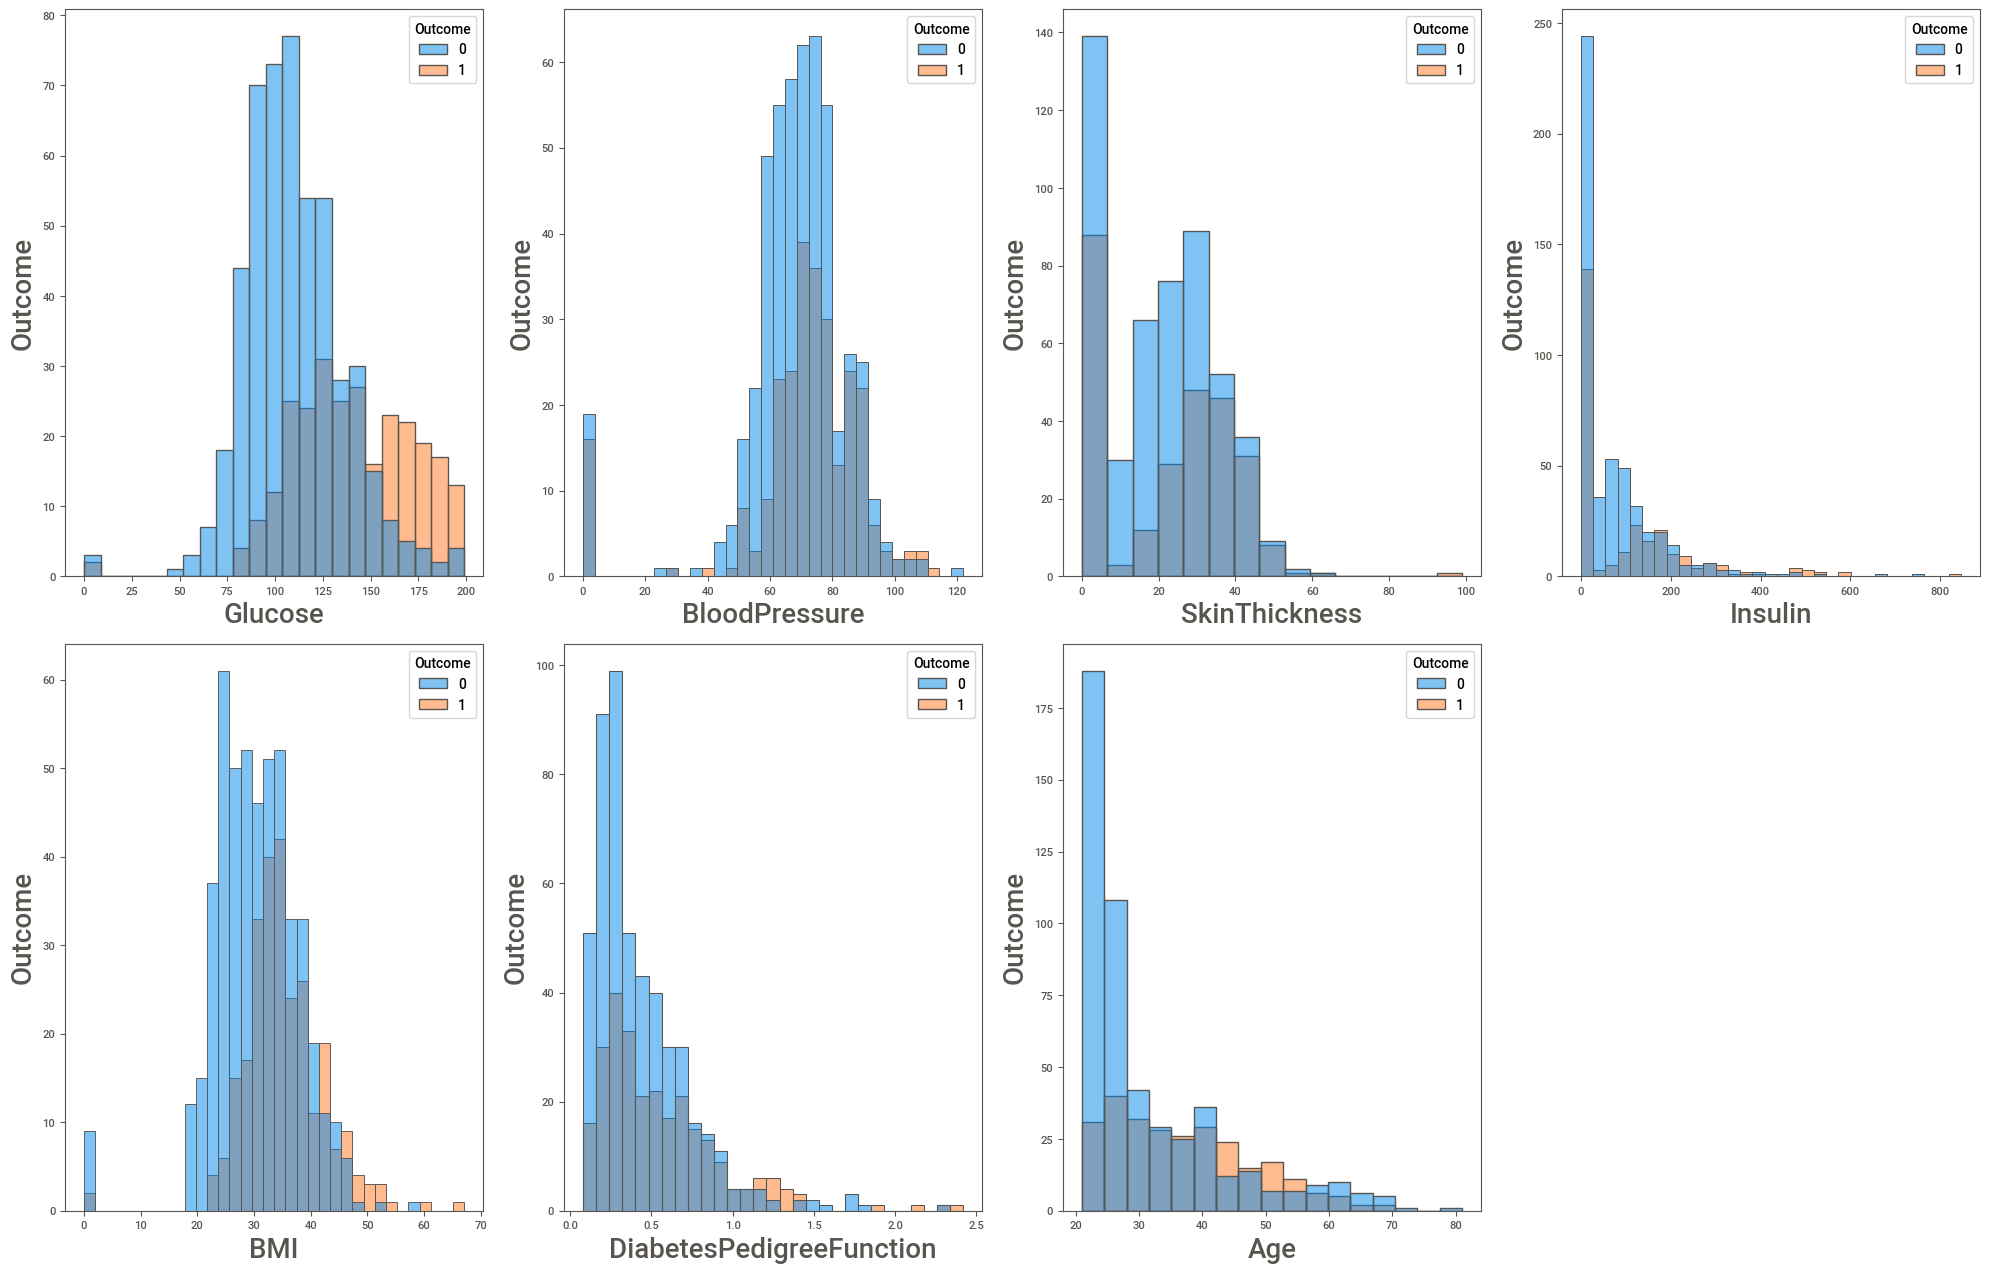

In [14]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in data1:#accessing the columns 
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data1[column],hue=data.Outcome)
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Outcome',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

## Data preprocessing

In [15]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Steps to perform in Feature engineering/data preprocessing**

1)Check missing values.Check for corrupted values if any.
2)Convert categorical variable into numerical
3)Handle outlier.
4)Scale the data
5)Transformation of data
6)Balance the data.

- It seems that there are no missing values in our data. Great, let's see the distribution of data:

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

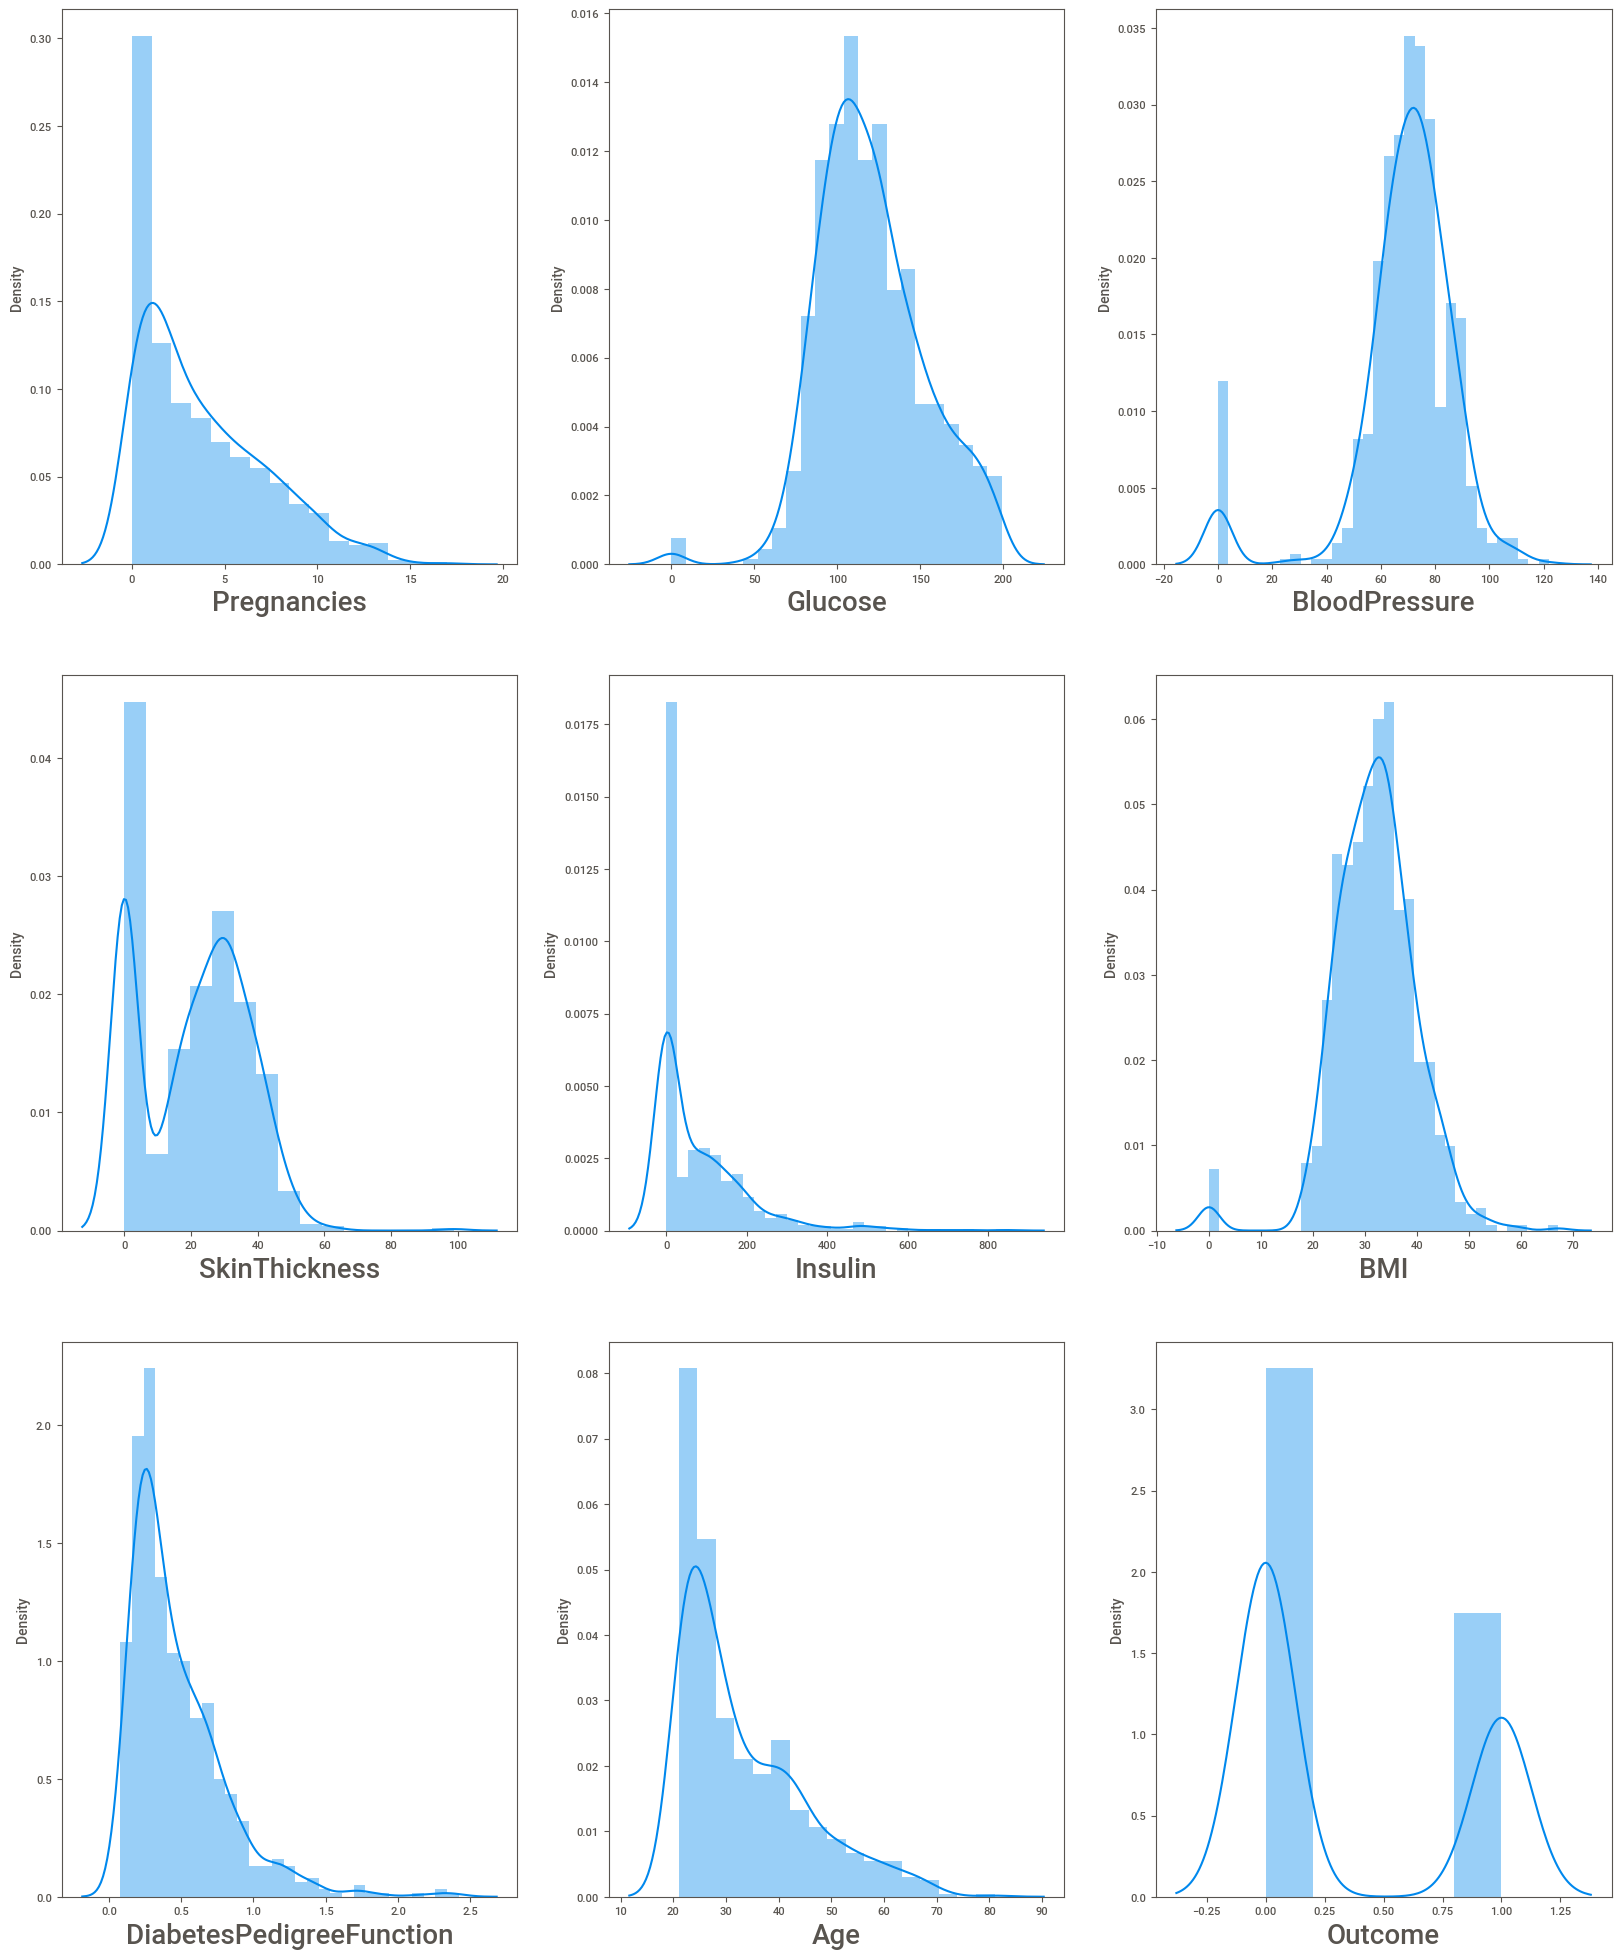

In [16]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')#defining  canvas size
plotnumber = 1 #maintian count for graph

for column in data:
    if plotnumber<=9 :# as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)# plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count 
        sns.distplot(data[column])#plotting dist plot to know distribution
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [17]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
data.loc[data['BMI']==0].head() # How many rows have BMI=0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0


In [19]:
data['BMI'].mean()#bmi column mean

31.992578124999998

In [20]:
# Replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0, data['BMI'].mean())  # Replacing 0 with the mean of the BMI
data['BloodPressure'] = data['BloodPressure'].replace(0, data['BloodPressure'].mean())  #Replacing 0 with the mean of the Blood Pressure
data['Glucose'] = data['Glucose'].replace(0, data['Glucose'].mean())  # Replacing 0 with the mean of the Glucose
data['Insulin'] = data['Insulin'].replace(0, data['Insulin'].mean())  # Replacing 0 with the mean of the Insulin
data['SkinThickness'] = data['SkinThickness'].replace(0, data['SkinThickness'].mean())  #Replacing 0 with the mean of the Skin Thickness

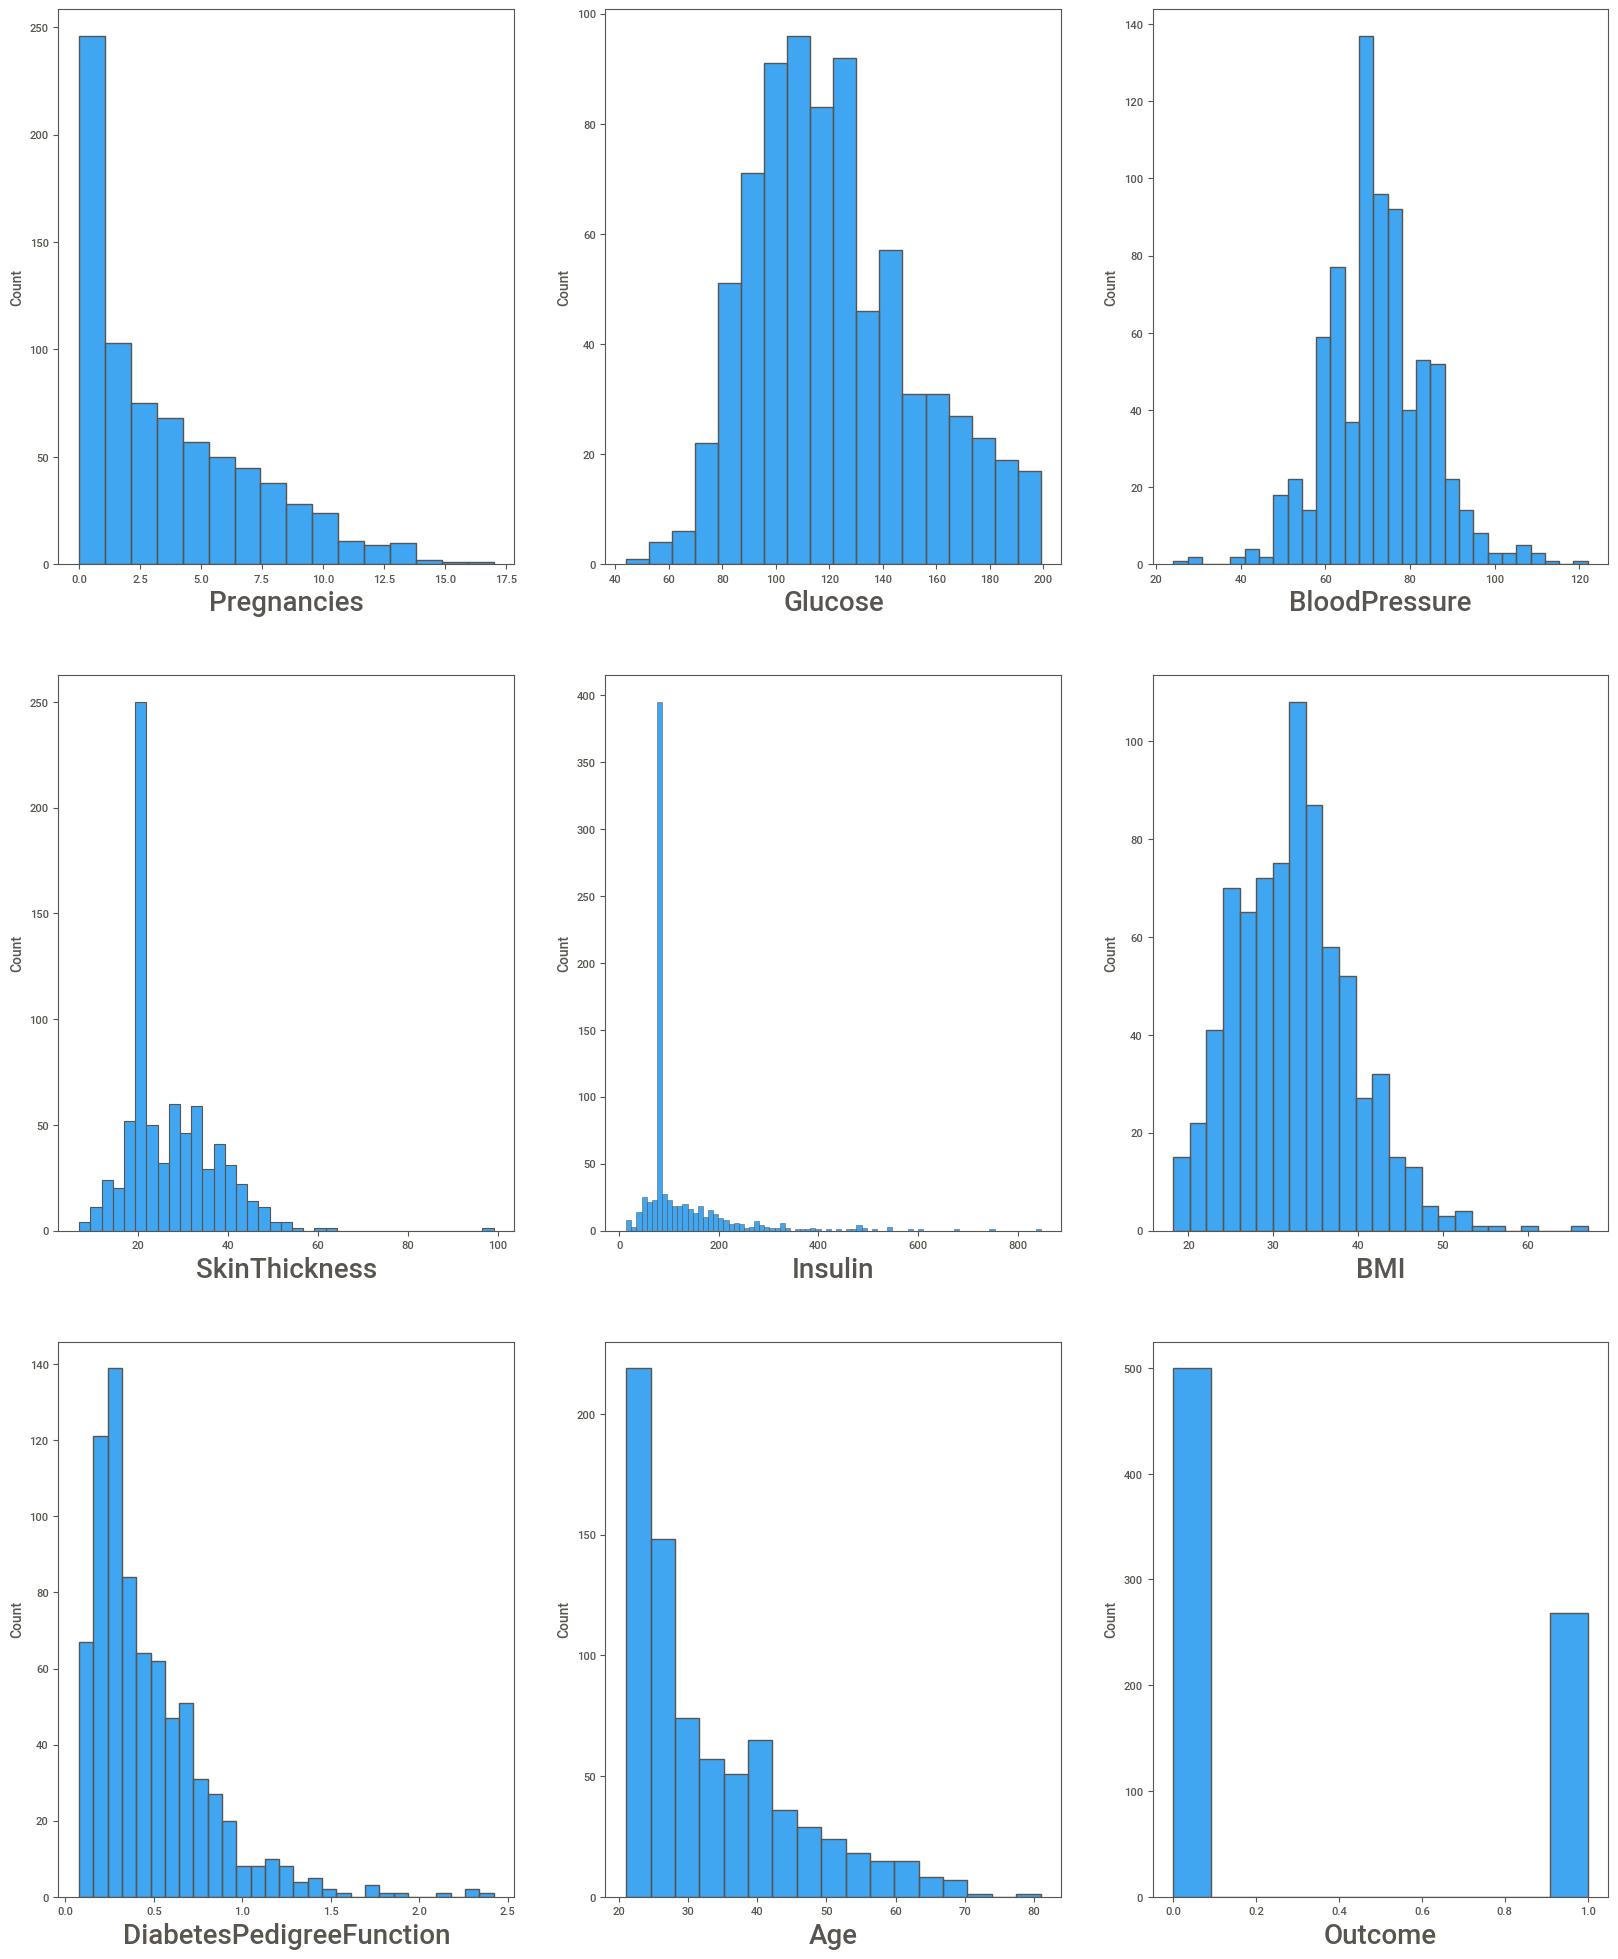

In [21]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data[column]) 
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#### The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

# Feature Selection

### Steps to follow in feature selection
##### 1)Removing redundant columns-->one unique value columns,ids columns,serial no.
##### 2)Check for highly correlated features.If correlation between 2 numerical feature is more than 0.9,remove one of them.

<Axes: >

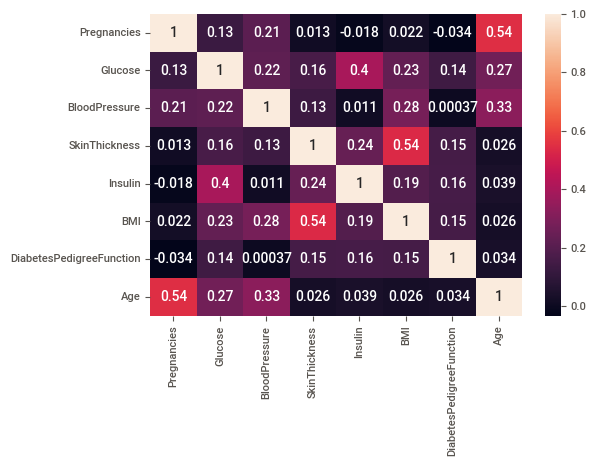

In [22]:
sns.heatmap(data.drop('Outcome',axis=1).corr(),annot=True)  # checking for correlation

In [23]:
#checking the duplicate rows
data.duplicated().sum()

0

# Model Creation

In [24]:
# Step:1 Define Dependant and indenpendant veriable
X = data.iloc[:,:8]
y = data.Outcome

# Step:2 Create Taring and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Step:4 Model creation
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression() # Object Creation

# Step:5 Fit the data
LR.fit(X_train,y_train)

# Step:6 Prdiction on test data
y_predict = LR.predict(X_test)
y_predict

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

# MODEL EVALUATION

In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# confusion matrix
print(confusion_matrix(y_test, y_predict))

# accuracy_score
AC = accuracy_score(y_test, y_predict)
print('accuracy score', AC)

# recall
recall = recall_score(y_test, y_predict)
print('recall', recall)

# precision
precision = precision_score(y_test, y_predict)
print("precision", precision)

# f1 score
f1 = f1_score(y_test, y_predict)
print('f1 score', f1)

# roc curve
print(roc_auc_score(y_test, y_predict))

# classification report
print(classification_report(y_test, y_predict))

# cross-tab
print(pd.crosstab(y_test, y_predict))

[[84 15]
 [19 36]]
accuracy score 0.7792207792207793
recall 0.6545454545454545
precision 0.7058823529411765
f1 score 0.679245283018868
0.7515151515151515
              precision    recall  f1-score   support

           0       0.82      0.85      0.83        99
           1       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154

col_0     0   1
Outcome        
0        84  15
1        19  36


# MULTICLASS CLASSIFICATION

In [26]:
data=pd.read_csv('iris.csv')# loading another dataset for multiclass classification

In [27]:
data.head()# first 5 rows

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
data.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

# MODEL CREATION

In [29]:
X=data.loc[:,['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']] #independent variable 
y=data.Species #dependent variable

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)# training and testing  data

In [31]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(multi_class='ovr')# logistic regression for multiclass classification ovr-> one vs rest

In [32]:
LR.fit(X_train,y_train)#  training model

LogisticRegression(multi_class='ovr')

In [33]:
y_hat=LR.predict(X_test)# predicting the results

# MODEL EVALUATION

In [34]:
pd.crosstab(y_test,y_hat) # confusion matrix 

col_0,setosa,versicolor,virginica
Species,,,
setosa,15,0,0
versicolor,0,10,1
virginica,0,0,12


In [35]:
recall=recall_score(y_test,y_hat,average='weighted') #checking recall 
recall

0.9736842105263158

In [36]:
precision=precision_score(y_test,y_hat,average='weighted')# checking precision
precision

0.9757085020242916

In [37]:
print(classification_report(y_test,y_hat))#recall,precision,f1 scores and accuracy

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



# Model Saving : Pickle File

In [40]:
import pickle

# open file where you want to store a data
file = open('logistic_regression_model.pkl','wb')

# dump imformation to that file
pickle.dump(LR,file)

#### The pickle.dump() function is used to save the trained logistic regression model 'LR' to the file in binary format. 
#### Now we load this model later from the pickle file and use it for making predictions without the need to retrain the model.